# 3.1 Classification with a single-layer perceptron

In [2]:
import numpy as np

### 3.1.1 Generation of linearly-separable data

In [26]:
n = 100

mA = [5, 2]
sigma = 4

aX = np.random.normal(mA[0], sigma, n)
aY = np.random.normal(mA[1], sigma, n)

In [50]:
a = np.stack((aX, aY, np.zeros(n)), axis=1)

In [28]:
mB = [-16, 22]
sigma = 4

bX = np.random.normal(mB[0], sigma, n)
bY = np.random.normal(mB[1], sigma, n)

In [51]:
b = np.stack((bX, bY, np.ones(n)), axis=1)

In [52]:
a

array([[ 9.49875401,  3.20278385,  0.        ],
       [ 6.68390368,  3.54397336,  0.        ],
       [ 7.32356691, -5.36333883,  0.        ],
       [ 5.35792786,  3.36036412,  0.        ],
       [ 4.62396749,  1.59575384,  0.        ],
       [ 6.7276656 ,  1.21434465,  0.        ],
       [ 1.07728416,  4.74336219,  0.        ],
       [-0.93804091,  7.06099858,  0.        ],
       [ 9.08892348, -4.42001021,  0.        ],
       [ 1.44267614,  1.90998238,  0.        ],
       [ 6.49456728,  2.79139451,  0.        ],
       [ 7.39807442,  3.98012559,  0.        ],
       [ 4.46182183,  2.03414763,  0.        ],
       [ 6.70147734, -3.55956759,  0.        ],
       [ 5.0923508 ,  7.76212258,  0.        ],
       [ 2.03076985,  1.17410088,  0.        ],
       [ 6.54871197,  0.38517652,  0.        ],
       [ 4.00612042,  3.23693081,  0.        ],
       [ 3.54900064,  2.831999  ,  0.        ],
       [-0.6836189 , -1.74805351,  0.        ],
       [ 2.72801936,  5.12588358,  0.   

In [53]:
b

array([[-15.68688943,  19.75305777,   1.        ],
       [-17.99649042,  24.57459835,   1.        ],
       [-17.97327103,  27.92869384,   1.        ],
       [-12.85333739,  20.2186904 ,   1.        ],
       [-25.19721297,  21.01978842,   1.        ],
       [-15.28365276,  21.24997282,   1.        ],
       [-15.10690434,  31.4903305 ,   1.        ],
       [-17.58762099,  32.55582484,   1.        ],
       [-26.23305364,  22.15333036,   1.        ],
       [-14.95550231,  23.82409146,   1.        ],
       [-20.68445326,  19.09715962,   1.        ],
       [-17.29277272,  20.73115026,   1.        ],
       [-18.88819216,  20.77686658,   1.        ],
       [-19.56438567,  17.66858169,   1.        ],
       [-25.75885187,  24.21105115,   1.        ],
       [-15.73424422,  29.03466179,   1.        ],
       [-12.96324985,  22.60885113,   1.        ],
       [-12.43164811,  23.82543017,   1.        ],
       [-12.64291752,  21.06473532,   1.        ],
       [-19.20187298,  26.69752

In [56]:
dataset = np.concatenate((a, b), axis=0)
dataset.shape, dataset

((200, 3),
 array([[  9.49875401,   3.20278385,   0.        ],
        [  6.68390368,   3.54397336,   0.        ],
        [  7.32356691,  -5.36333883,   0.        ],
        [  5.35792786,   3.36036412,   0.        ],
        [  4.62396749,   1.59575384,   0.        ],
        [  6.7276656 ,   1.21434465,   0.        ],
        [  1.07728416,   4.74336219,   0.        ],
        [ -0.93804091,   7.06099858,   0.        ],
        [  9.08892348,  -4.42001021,   0.        ],
        [  1.44267614,   1.90998238,   0.        ],
        [  6.49456728,   2.79139451,   0.        ],
        [  7.39807442,   3.98012559,   0.        ],
        [  4.46182183,   2.03414763,   0.        ],
        [  6.70147734,  -3.55956759,   0.        ],
        [  5.0923508 ,   7.76212258,   0.        ],
        [  2.03076985,   1.17410088,   0.        ],
        [  6.54871197,   0.38517652,   0.        ],
        [  4.00612042,   3.23693081,   0.        ],
        [  3.54900064,   2.831999  ,   0.        ],
 

In [59]:
np.random.shuffle(dataset)
dataset

array([[-15.10103249,  20.91000355,   1.        ],
       [ -2.36930016,  -0.56546682,   0.        ],
       [-25.75885187,  24.21105115,   1.        ],
       [-16.05853581,  22.85353404,   1.        ],
       [  6.7276656 ,   1.21434465,   0.        ],
       [  5.07461143,  -0.29456243,   0.        ],
       [  6.50723649,   1.20390909,   0.        ],
       [ -1.23367984,   2.30053082,   0.        ],
       [ 16.34924606,   1.48709344,   0.        ],
       [  5.59633729,  -3.48039774,   0.        ],
       [  5.0923508 ,   7.76212258,   0.        ],
       [-15.94261469,  16.85002001,   1.        ],
       [  8.14210661,   3.19583656,   0.        ],
       [-14.65640875,  23.96122039,   1.        ],
       [  2.38490365,   1.19423041,   0.        ],
       [-16.68897015,  24.21988088,   1.        ],
       [-24.04668085,  23.07936552,   1.        ],
       [-22.01609401,  28.50781793,   1.        ],
       [ -0.16324129,   3.76158702,   0.        ],
       [-20.60583304,  24.09161

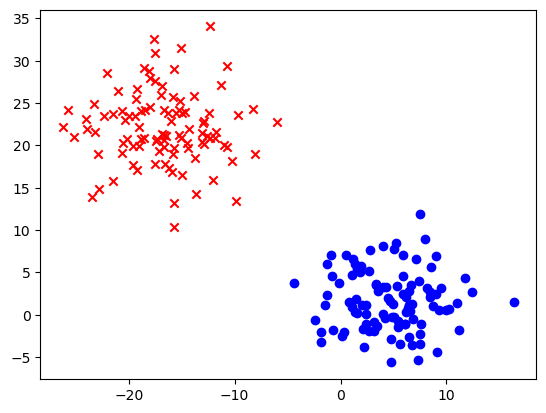

In [60]:
import matplotlib.pyplot as plt
plt.scatter(a[:, 0], a[:, 1], c='b', label='a', marker='o')
plt.scatter(b[:, 0], b[:, 1], c='r', label='b', marker='x')

### 3.1.2 Classification with a single-layer perceptron and analysis

### 3.1.3 Classification of samples that are not linearly separable